In [1]:
import pandas as pd
import matplotlib.pyplot as plt

alphas = [0.2, 0.4, 0.5, 0.6, 0.8]

df = pd.DataFrame()

for alpha in alphas:
    df_aux = pd.read_csv(f'data/tests_{alpha}.csv')
    df['problem'] = df_aux['problem']
    df['optimal'] = df_aux['optimal'].astype(int)
    df[f'time_{alpha}'] = df_aux['time']
    df[f'cost_{alpha}'] = df_aux['cost']
    df[f'gap_{alpha}'] = (df_aux['cost'] - df_aux['optimal'])/df_aux['optimal']

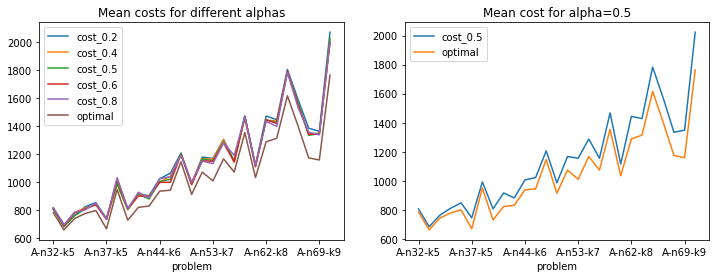

In [2]:
cols = ['problem']

fig, ax = plt.subplots(ncols=2, figsize=(12, 4));
ax[0].set_title("Mean costs for different alphas")
ax[1].set_title("Mean cost for alpha=0.5")
df.groupby(['problem'], as_index=False).mean()[['problem', 'cost_0.2', 'cost_0.4', 'cost_0.5', 'cost_0.6', 'cost_0.8', 'optimal']].plot(x="problem", ax=ax[0], legend=True);
df.groupby(['problem'], as_index=False).mean()[['problem', 'cost_0.5', 'optimal']].plot(x="problem", ax=ax[1], legend=True);

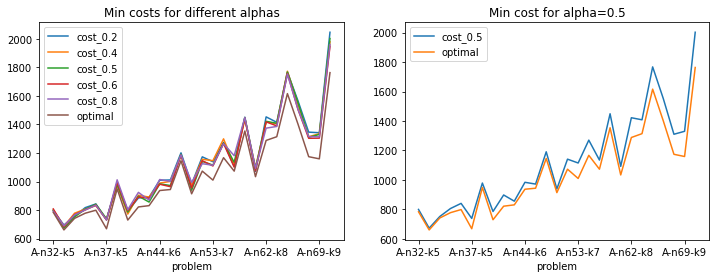

In [3]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4));
ax[0].set_title("Min costs for different alphas")
ax[1].set_title("Min cost for alpha=0.5")
df.groupby(['problem'], as_index=False).min()[['problem', 'cost_0.2', 'cost_0.4', 'cost_0.5', 'cost_0.6', 'cost_0.8', 'optimal']].plot(x="problem", ax=ax[0], legend=True);
df.groupby(['problem'], as_index=False).min()[['problem', 'cost_0.5', 'optimal']].plot(x="problem", ax=ax[1], legend=True);

gap_0.2    0.101968
gap_0.4    0.091022
gap_0.5    0.087394
gap_0.6    0.086551
gap_0.8    0.091880
dtype: float64


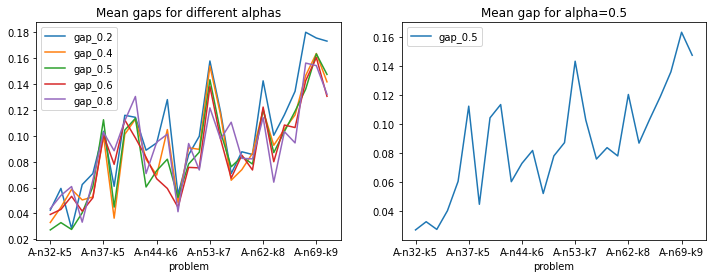

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4));
ax[0].set_title("Mean gaps for different alphas")
mean_gap = df.groupby(['problem'], as_index=False).mean()[['problem', 'gap_0.2', 'gap_0.4', 'gap_0.5', 'gap_0.6', 'gap_0.8']]
mean_gap.plot(x="problem", ax=ax[0], legend=True);

ax[1].set_title("Mean gap for alpha=0.5")
mean_gap[['problem', 'gap_0.5']].plot(x="problem", ax=ax[1], legend=True);
print(mean_gap.mean(numeric_only=True))

gap_0.2    0.015306
gap_0.4    0.019133
gap_0.5    0.013477
gap_0.6    0.021186
gap_0.8    0.010204
dtype: float64


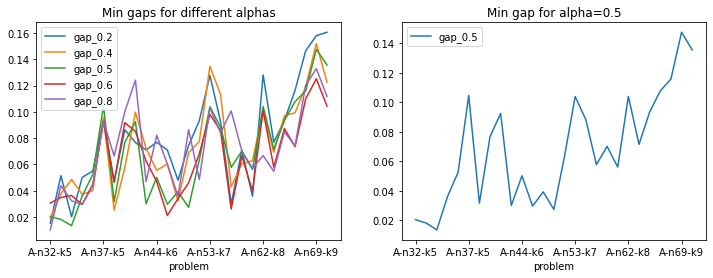

In [10]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4));
ax[0].set_title("Min gaps for different alphas")
min_gap = df.groupby(['problem'], as_index=False).min()[['problem', 'gap_0.2', 'gap_0.4', 'gap_0.5', 'gap_0.6', 'gap_0.8']]
min_gap.plot(x="problem", ax=ax[0], legend=True);

ax[1].set_title("Min gap for alpha=0.5")
min_gap[['problem', 'gap_0.5']].plot(x="problem", ax=ax[1], legend=True);
print(min_gap.min(numeric_only=True))

In [16]:
alpha = 0.5
mean = df.groupby(['problem'])[[f'optimal', f'cost_{alpha}', f'time_{alpha}', f'gap_{alpha}']].mean().set_axis(['optimal', 'mean_cost', 'mean_time', 'mean_gap'], axis=1)
min = df.groupby(['problem'])[[f'cost_{alpha}', f'time_{alpha}', f'gap_{alpha}']].min().set_axis(['min_cost', 'min_time', 'min_gap'], axis=1)
results = pd.DataFrame()
results = pd.concat([results, mean, min], axis=1)
results = results[['optimal', 'min_cost', 'mean_cost', 'min_gap', 'mean_gap', 'min_time', 'mean_time']]
results['optimal'] = results['optimal'].astype(int)
results

,optimal,min_cost,mean_cost,min_gap,mean_gap,min_time,mean_time
problem,,,,,,,
A-n32-k5,784,800,805.375,0.020408,0.027264,0.27904,0.284023
A-n33-k5,661,673,682.750,0.018154,0.032905,0.30096,0.307613
A-n33-k6,742,752,762.500,0.013477,0.027628,0.35195,0.367410
A-n34-k5,778,806,809.500,0.035990,0.040488,0.30979,0.323099
A-n36-k5,799,841,847.500,0.052566,0.060701,0.32447,0.345008
A-n37-k5,669,739,744.250,0.104634,0.112481,0.34160,0.377485
A-n37-k6,949,979,991.625,0.031612,0.044916,0.49195,0.526574
A-n38-k5,730,786,806.250,0.076712,0.104452,0.38237,0.388578
A-n39-k5,822,898,915.375,0.092457,0.113595,0.39400,0.400481


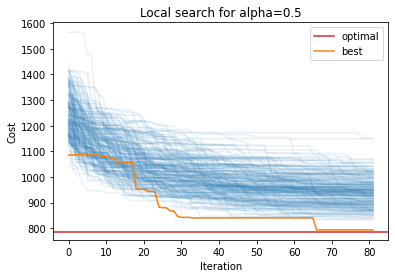

In [19]:
import numpy as np

local_search = pd.read_csv('data/local_search.csv', sep=';', header=None).fillna(method='ffill', axis=1).transpose().astype(int)
fig, ax = plt.subplots();

local_search.plot(ax=ax, color='tab:blue', alpha=0.1, legend=None);
local_search.transpose()[local_search.transpose()[81] == local_search.transpose()[81].min()].transpose().plot(ax=ax, color='tab:orange', label='best')
ax.axhline(y=784, color='tab:red', label='optimal');

handles, labels = ax.get_legend_handles_labels();
ax.legend(reversed(handles), ['optimal', 'best'], loc='best');
ax.set_title("Local search for alpha=0.5");
ax.set_xlabel("Iteration");
ax.set_ylabel("Cost");
